In [1]:
import torch
import numpy as np
import cv2
import scipy

# from torch import nn
from PIL import Image, ImageOps
import matplotlib.pyplot as plt


from numpy import dot
from numpy.linalg import matrix_rank, inv
from numpy.random import permutation
from scipy.linalg import eigh
from scipy.linalg import norm as mnorm
from scipy.stats import ortho_group

import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim.lr_scheduler import CosineAnnealingLR, OneCycleLR

import os


import ica

import sys
sys.path.append('/data/users2/yxiao11/model/ICA')
from modules.util import entropyLoss, getdata, infomaxICA, entropy
# from modules.kde import kernel_density_estimator
# import n_sphere



In [2]:
file_name = os.listdir('/data/users2/yxiao11/model/ICA/data')
dir_list = []
for name in file_name[0:10]:
    dir_list.append('/data/users2/yxiao11/model/ICA/data/'+name)
num_of_img = len(dir_list)
# num_of_img = 3
resize = 128

array_list=[]

for img_dir in dir_list:
    image = Image.open(img_dir)
    image = np.array(ImageOps.grayscale(image))
    image = cv2.resize(image, (resize, resize))
#     image = torch.from_numpy(image).float().flatten()
    image = np.expand_dims(image.flatten(), axis=0)
    array_list.append(image)

img_concate = np.concatenate(array_list)
np.random.seed(1)

# D = np.diag(2**np.array([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7], dtype=float))

# B = ortho_group.rvs(dim=num_of_img)
# A = B @ D
# A = np.random.normal(0, 1, size=(num_of_img,num_of_img))
A = np.random.rand(num_of_img,num_of_img)
mixture = A@img_concate

print(A, img_concate.shape, sep='\n')

print('condition number:', np.linalg.cond(A))


[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
  1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
  3.96767474e-01 5.38816734e-01]
 [4.19194514e-01 6.85219500e-01 2.04452250e-01 8.78117436e-01
  2.73875932e-02 6.70467510e-01 4.17304802e-01 5.58689828e-01
  1.40386939e-01 1.98101489e-01]
 [8.00744569e-01 9.68261576e-01 3.13424178e-01 6.92322616e-01
  8.76389152e-01 8.94606664e-01 8.50442114e-02 3.90547832e-02
  1.69830420e-01 8.78142503e-01]
 [9.83468338e-02 4.21107625e-01 9.57889530e-01 5.33165285e-01
  6.91877114e-01 3.15515631e-01 6.86500928e-01 8.34625672e-01
  1.82882773e-02 7.50144315e-01]
 [9.88861089e-01 7.48165654e-01 2.80443992e-01 7.89279328e-01
  1.03226007e-01 4.47893526e-01 9.08595503e-01 2.93614148e-01
  2.87775339e-01 1.30028572e-01]
 [1.93669579e-02 6.78835533e-01 2.11628116e-01 2.65546659e-01
  4.91573159e-01 5.33625451e-02 5.74117605e-01 1.46728575e-01
  5.89305537e-01 6.99758360e-01]
 [1.02334429e-01 4.14055988e-01 6.94400158e-01 4.14179270e

# plot of ica.ica1 output

In [3]:
# A0, r, W = ica.ica1(mixture, num_of_img, verbose=True)
# # print(w)


# plt.figure(figsize=(10,10))

# sub_shape = num_of_img

# for i in range(sub_shape):
#     for j in range(sub_shape):
#         plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
#         plt.plot(r[i], r[j], '.', ms=0.1)


# %matplotlib inline

# plt.figure(figsize=(10,10))
# for i in range(num_of_img):
#     plt.subplot(num_of_img, 2, i*2+1)
#     plt.imshow(np.reshape(mixture[i], (resize,resize)), cmap='gray')
#     plt.title('mixture')
#     plt.axis('off')
    
#     plt.subplot(num_of_img, 2, i*2+2)
#     plt.imshow(np.reshape(r[i], (resize,resize)), cmap='gray')
#     plt.title('output')
#     plt.axis('off')

In [4]:
#data whitening
# minim = np.expand_dims(np.min(mixture, axis=1),1)
# maxim = np.expand_dims(np.max(mixture, axis=1),1)
# mixture = (mixture-minim)/(maxim-minim)


# IPT = x_white.copy()
# IPT = torch.from_numpy(IPT).type(torch.float32)
# IPT = torch.from_numpy(mixture).type(torch.float32)
# IPT = (IPT - IPT.mean(axis=1).unsqueeze(1))/(IPT.std(axis=1, unbiased=False).unsqueeze(1))

# IPT_white = IPT.clone()

x_white, white, dewhite = ica.pca_whiten(mixture, num_of_img)

IPT = torch.from_numpy(x_white.copy()).type(torch.float32)

# minim = torch.min(IPT, axis=1)[0].unsqueeze(1)
# maxim = torch.max(IPT, axis=1)[0].unsqueeze(1)
# IPT = (IPT-minim)/(maxim-minim)

In [5]:
# %matplotlib inline
# plt.figure(figsize=(20,20))

# index = num_of_img

# for row in range(index):
#     for column in range(index):
#         plt.subplot(index, index, row*index + column+1)
#         plt.plot(x_white[row], x_white[column], '.', ms=0.5)

In [6]:
# %matplotlib inline
# plt.figure(figsize=(20,20))

# index = num_of_img

# for row in range(index):
#     for column in range(index):
#         plt.subplot(index, index, row*index + column+1)
#         plt.plot(x_white[row], x_white[column], '.', ms=0.5)

In [7]:
device = torch.device('cuda:0')

In [8]:
model = infomaxICA(num_of_img)

In [9]:
learning_rate = 0.03 / np.log(num_of_img)
# learning_rate = 0.0001
batch_size = int(np.floor(np.sqrt(IPT.shape[1] / 3)))
# batch_size = int(resize*resize)
# batch_size = 1024
dataset = getdata(IPT)
sampler = SequentialSampler(dataset)
# sampler = RandomSampler(dataset)
loader = DataLoader(dataset=dataset, sampler=sampler, batch_size=batch_size, num_workers=3)

# optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),
                             lr=learning_rate,
                             eps=10e-4,
                             weight_decay = 1e-4,
                            )


num_epoch = 500
# scheduler = CosineAnnealingLR(optimizer, T_max = num_epoch/2)
scheduler = OneCycleLR(optimizer, 
                       learning_rate, 
                       steps_per_epoch=len(loader), 
                       epochs=num_epoch,
                      )

# np.linalg.inv(model.W1.weight.data)

/data/users2/yxiao11/anaconda3/envs/p37/lib/python3.7/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [10]:
model = model.to(device)
IPT = IPT.to(device)

In [11]:
loss_tracker = []

In [12]:
def norm(x):
    """Computes the norm of a vector or the Frobenius norm of a
    matrix_rank
    """
    return torch.norm(torch.flatten(x))

In [13]:
def my_loss(data):
    """
    Compute the kurtosis of a set of data using PyTorch.

    Args:
    data (torch.Tensor): A 1D tensor containing the data.

    Returns:
    float: The kurtosis of the data.
    """
    # Calculate the mean and standard deviation of the data
    mean = torch.mean(data, axis=0)
    std = torch.std(data, axis=0)

    # Calculate the fourth central moment (raw kurtosis)
    fourth_moment = torch.mean((data - mean)**4, axis=0)

    # Calculate the kurtosis using the fourth central moment
    n = data.size(0)
    kurtosis = fourth_moment / (std**4) - 3.0

    return torch.sum(-kurtosis**2)
#     return kurtosis

def infonce(opt, ipt_batch, t=100):
    
    _, d = opt.shape
    
    f = torch.exp(torch.norm(ipt_batch.T@opt, dim=0)/t)
    Ln = 0
    for i in range(d):
        index = [x for x in range(d) if x!=i]
        denominator = f[index].sum() + 1e-12
        
        numerator = f[i]
        Ln += torch.log(numerator/denominator)
    return Ln.sum()/d

<IPython.core.display.Javascript object>


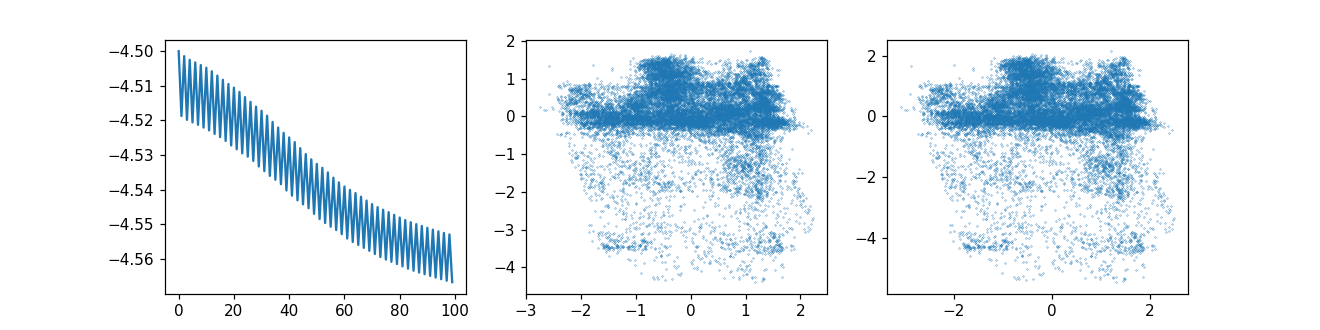

lr changed to: 0.011725951011387799
1 tensor(90.) -0.140557199716568 tensor(0.0201, device='cuda:0')
2 tensor(23.3542) -0.15314212441444397 tensor(0.0194, device='cuda:0')
3 tensor(29.1945) -0.1684037446975708 tensor(0.0189, device='cuda:0')
4 tensor(36.6319) -0.18695463240146637 tensor(0.0167, device='cuda:0')
5 tensor(45.9814) -0.2125416100025177 tensor(0.0147, device='cuda:0')
6 tensor(54.8206) -0.2452652007341385 tensor(0.0132, device='cuda:0')
7 tensor(59.1379) -0.2800638675689697 tensor(0.0117, device='cuda:0')
lr changed to: 0.010553355910249019
8 tensor(63.0472) -0.32272645831108093 tensor(0.0106, device='cuda:0')
9 tensor(21.9436) -0.3707609474658966 tensor(0.0106, device='cuda:0')
10 tensor(24.4245) -0.4192527234554291 tensor(0.0106, device='cuda:0')
11 tensor(35.3621) -0.4697110950946808 tensor(0.0106, device='cuda:0')
12 tensor(38.0723) -0.524909257888794 tensor(0.0112, device='cuda:0')
13 tensor(46.4098) -0.5805972814559937 tensor(0.0114, device='cuda:0')
14 tensor(46.8949

lr changed to: 1.8964489269380354e-05
85 tensor(113.5482) -3.4606969356536865 tensor(0.0015, device='cuda:0')
lr changed to: 1.7068040342442318e-05
86 tensor(108.6907) -3.4432854652404785 tensor(0.0016, device='cuda:0')
lr changed to: 1.5361236308198088e-05
87 tensor(102.9073) -3.484325647354126 tensor(0.0017, device='cuda:0')
lr changed to: 1.3825112677378279e-05
88 tensor(97.8598) -3.4674997329711914 tensor(0.0018, device='cuda:0')
lr changed to: 1.2442601409640452e-05
89 tensor(94.4372) -3.5100295543670654 tensor(0.0018, device='cuda:0')
lr changed to: 1.1198341268676408e-05
90 tensor(90.9973) -3.494065999984741 tensor(0.0019, device='cuda:0')
lr changed to: 1.0078507141808768e-05
91 tensor(85.5985) -3.5410232543945312 tensor(0.0021, device='cuda:0')
lr changed to: 9.070656427627891e-06
92 tensor(82.5250) -3.528351068496704 tensor(0.0022, device='cuda:0')
lr changed to: 8.163590784865102e-06
93 tensor(87.9737) -3.577990770339966 tensor(0.0018, device='cuda:0')
lr changed to: 7.34723

lr changed to: 7.016642654242975e-09
160 tensor(160.1345) -4.046610355377197 tensor(0.0021, device='cuda:0')
lr changed to: 6.314978388818678e-09
161 tensor(159.7285) -4.069715976715088 tensor(0.0021, device='cuda:0')
lr changed to: 5.6834805499368105e-09
162 tensor(159.7189) -4.049187183380127 tensor(0.0021, device='cuda:0')
lr changed to: 5.11513249494313e-09
163 tensor(159.3446) -4.0720295906066895 tensor(0.0021, device='cuda:0')
lr changed to: 4.603619245448817e-09
164 tensor(159.3850) -4.051689147949219 tensor(0.0021, device='cuda:0')
lr changed to: 4.143257320903936e-09
165 tensor(159.0788) -4.074282169342041 tensor(0.0021, device='cuda:0')
lr changed to: 3.728931588813542e-09
166 tensor(159.1589) -4.054128170013428 tensor(0.0021, device='cuda:0')
lr changed to: 3.3560384299321883e-09
167 tensor(158.9386) -4.076467514038086 tensor(0.0021, device='cuda:0')
lr changed to: 3.0204345869389694e-09
168 tensor(159.0528) -4.056493282318115 tensor(0.0021, device='cuda:0')
lr changed to: 2

lr changed to: 2.5960769856762173e-12
235 tensor(147.1815) -4.147115230560303 tensor(0.0020, device='cuda:0')
lr changed to: 2.3364692871085958e-12
236 tensor(146.1451) -4.130398750305176 tensor(0.0019, device='cuda:0')
lr changed to: 2.102822358397736e-12
237 tensor(145.5449) -4.149506568908691 tensor(0.0020, device='cuda:0')
lr changed to: 1.8925401225579625e-12
238 tensor(144.2466) -4.132885932922363 tensor(0.0019, device='cuda:0')
lr changed to: 1.7032861103021663e-12
239 tensor(143.2687) -4.151900768280029 tensor(0.0020, device='cuda:0')
lr changed to: 1.5329574992719497e-12
240 tensor(141.5763) -4.135395526885986 tensor(0.0019, device='cuda:0')
lr changed to: 1.3796617493447548e-12
241 tensor(140.0630) -4.154343128204346 tensor(0.0020, device='cuda:0')
lr changed to: 1.2416955744102793e-12
242 tensor(137.7576) -4.137996673583984 tensor(0.0020, device='cuda:0')
lr changed to: 1.1175260169692515e-12
243 tensor(135.3116) -4.156949996948242 tensor(0.0021, device='cuda:0')
lr changed 

lr changed to: 9.605185909649044e-16
310 tensor(161.4144) -4.523592472076416 tensor(0.0020, device='cuda:0')
lr changed to: 8.64466731868414e-16
311 tensor(160.2987) -4.54022216796875 tensor(0.0019, device='cuda:0')
lr changed to: 7.780200586815726e-16
312 tensor(161.1839) -4.524913787841797 tensor(0.0020, device='cuda:0')
lr changed to: 7.002180528134153e-16
313 tensor(161.0386) -4.541714191436768 tensor(0.0019, device='cuda:0')
lr changed to: 6.301962475320739e-16
314 tensor(161.5374) -4.526259899139404 tensor(0.0020, device='cuda:0')
lr changed to: 5.671766227788665e-16
315 tensor(162.0188) -4.543045997619629 tensor(0.0019, device='cuda:0')
lr changed to: 5.104589605009798e-16
316 tensor(161.6120) -4.528013229370117 tensor(0.0020, device='cuda:0')
lr changed to: 4.594130644508819e-16
317 tensor(162.5302) -4.544219970703125 tensor(0.0019, device='cuda:0')
lr changed to: 4.1347175800579367e-16
318 tensor(162.0429) -4.529720783233643 tensor(0.0020, device='cuda:0')
lr changed to: 3.721

KeyboardInterrupt: 

In [14]:
%matplotlib notebook

k = int(batch_size*0.16)

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
# ax2 = fig.add_subplot(133, projection='3d')
ax3 = fig.add_subplot(133)

# trace = []
change = 100
W_STOP = 1e-10
d_weigths = torch.zeros(num_of_img)
old_d_weights = torch.zeros([1, num_of_img])
torch_pi = torch.acos(torch.zeros(1)).item() * 2 

# for epoch in range(num_epoch):
step0 = 0
angle_delta = 0
# while step0 < num_epoch and change > W_STOP:
for i in range(2000):
    LOSS = 0
    old_weight = torch.clone(model.W1.weight.data)
    for step, ipt in enumerate(loader):
        model.zero_grad()
        ipt = ipt.to(device)
        
        opt = model.forward(ipt)
#------------------------------sphe2cartesin----------------------------------
        
#         opt = angle2cart(opt)
#         opt = spher2cart(opt)
    
#---------------------------------------------------------------
#         loss = entropyLoss(opt.permute(1,0), device=device)
#         loss = entropy(opt, k=k, dis=1)
        loss = my_loss(opt) + infonce(opt, ipt)
        loss.backward()
        optimizer.step()
        LOSS+=loss
    d_weigths = model.W1.weight.data - old_weight
    change = norm(d_weigths)**2
    d_weigths = d_weigths.cpu()
    if step > 2:
        angle_delta = torch.arccos(
                    torch.sum(d_weigths * old_d_weights) /
                    (norm(d_weigths) * norm(old_d_weights) + 1e-8)
                ) * 180 / torch_pi
    if angle_delta > 60:
        learning_rate = learning_rate * 0.9
        
        print('lr changed to:', learning_rate)
        
        optimizer.param_groups[0]['lr'] = learning_rate
        old_d_weights = torch.clone(d_weigths)
    elif step == 1:
        old_d_weights = torch.clone(d_weigths)
        
        
        
    LOSS = LOSS.cpu()
    loss_tracker.append(LOSS.detach().numpy()/len(loader.sampler))
    if step0 % 2 == 0:
        
#         index = np.random.randint(0,num_of_img, 2)
        index = [0,1]
        ax.clear()
        ax.plot(loss_tracker[-100:])
        fig.canvas.draw()
    
#         data = model.forward(IPT.T).cpu().detach().numpy()
        data1 = model.forward(IPT.T)
#         data2 = angle2cart(data1).cpu().detach().numpy()
#         data2 = spher2cart(data1).cpu().detach().numpy()
        data1 = data1.cpu().detach().numpy()
        data = (IPT.T@model.W1.weight.data.T).cpu().detach().numpy()
#         data2 = data.cpu().detach().numpy()
        ax1.clear()
        ax1.plot(data1[:, index[0]], data1[:, index[1]], '.', ms=0.5)
        fig.canvas.draw()
        
#         ax2.clear()
#         ax2.scatter(data2[:,-1], data2[:,-2], data2[:,-3], c = 'r', s=0.1)

# #         ax2.set_xlim3d(-2,2)
# #         ax2.set_ylim3d(-2,2)
# #         ax2.set_zlim3d(-2,2)
#         ax2.set_xlim3d(-10,10)
#         ax2.set_ylim3d(-10,10)
#         ax2.set_zlim3d(-10,10)
        
#         fig.canvas.draw()

        ax3.clear()
        
        ax3.plot(data[:, index[0]], data[:, index[1]], '.', ms=0.5)
        fig.canvas.draw()
        

    

    step0 += 1
    print(step0, angle_delta, LOSS.detach().numpy()/len(loader.sampler), change)
    scheduler.step()

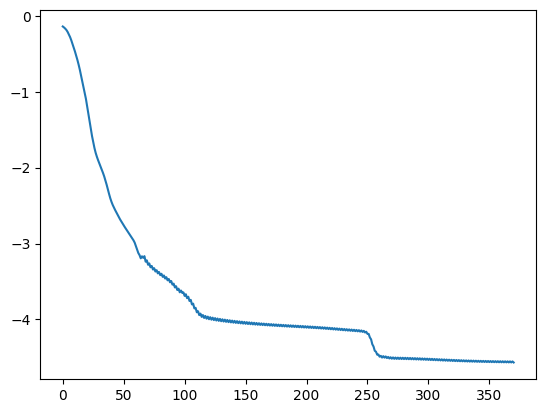

In [15]:
%matplotlib inline
plt.plot(loss_tracker)

In [16]:
# %matplotlib notebook
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # Data for a three-dimensional line
# zline = data2[:, -1]
# xline = data2[:, -2]
# yline = data2[:, -3]

# ax.set_xlim3d(-10,10)
# ax.set_ylim3d(-10,10)
# ax.set_zlim3d(-10,10)

# ax.scatter(xline, yline, zline, c = 'r', s=0.1)

In [17]:
# %matplotlib inline

# plt.plot(data2[:,0], data2[:,1], '.', ms=0.5)
# plt.axis('square')

In [18]:
# nn_rescale_opt = data.copy()

# nn_rescale_opt[nn_rescale_opt>np.pi] -= np.pi
# nn_rescale_opt[nn_rescale_opt<-np.pi] += np.pi

# nn_rescale_opt[nn_rescale_opt>np.pi] -= 2*np.pi
# nn_rescale_opt[nn_rescale_opt<-np.pi] += 2*np.pi

# %matplotlib inline
# plt.plot(nn_rescale_opt[:,0], nn_rescale_opt[:,1], '.', ms=0.5)
# plt.axis('square')

In [19]:
# %matplotlib notebook
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # Data for a three-dimensional line
# zline = data2[:, -1]
# xline = data2[:, -2]
# yline = data2[:, -3]
# ax.scatter(xline, yline, zline, c = 'r', s=0.1)

# ax.set_xlim3d(-10,10)
# ax.set_ylim3d(-10,10)
# ax.set_zlim3d(-10,10)

# plt.axis('auto')

In [20]:
# # generate uniform dense torus for compare

# rand_val = torch.randn(4096, num_of_img) 
# A = torch.tanh(rand_val)*np.pi*2
# P = angle2cart(A)

# %matplotlib notebook
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # Data for a three-dimensional line
# zline = P[:, -1]
# xline = P[:, -2]
# yline = P[:, -3]
# ax.scatter(xline, yline, zline, c = 'r', s=0.1)

# ax.set_xlim3d(-10,10)
# ax.set_ylim3d(-10,10)
# ax.set_zlim3d(-10,10)

In [21]:
# opt = model.forward(IPT.T).cpu()
# opt = angle2cart(opt)

# print('the eutropy of uniform:', entropy(P, k=3))
# print('the entropy of angle to cart:', entropy(opt, k=3))

In [22]:
# model = model.cpu()
# IPT = IPT.cpu()
# data = (IPT.T@model.W1.weight.data.T).cpu().detach().numpy()

In [23]:
# data = (IPT.T@model.W1.weight.data.T).cpu().detach().numpy()
# data = model.forward(IPT.T).cpu().detach().numpy()


In [24]:
# %matplotlib inline
# # plt.plot(data[:,0], data[:,1], '.', ms=0.5)
# # # plt.axis('square')
# plt.figure(figsize=(10,10))
# sub_shape = num_of_img
# for i in range(sub_shape):
#     for j in range(sub_shape):
#         plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
#         plt.plot(data[:, i], data[:, j], '.', ms=1)
#         plt.axis('square')

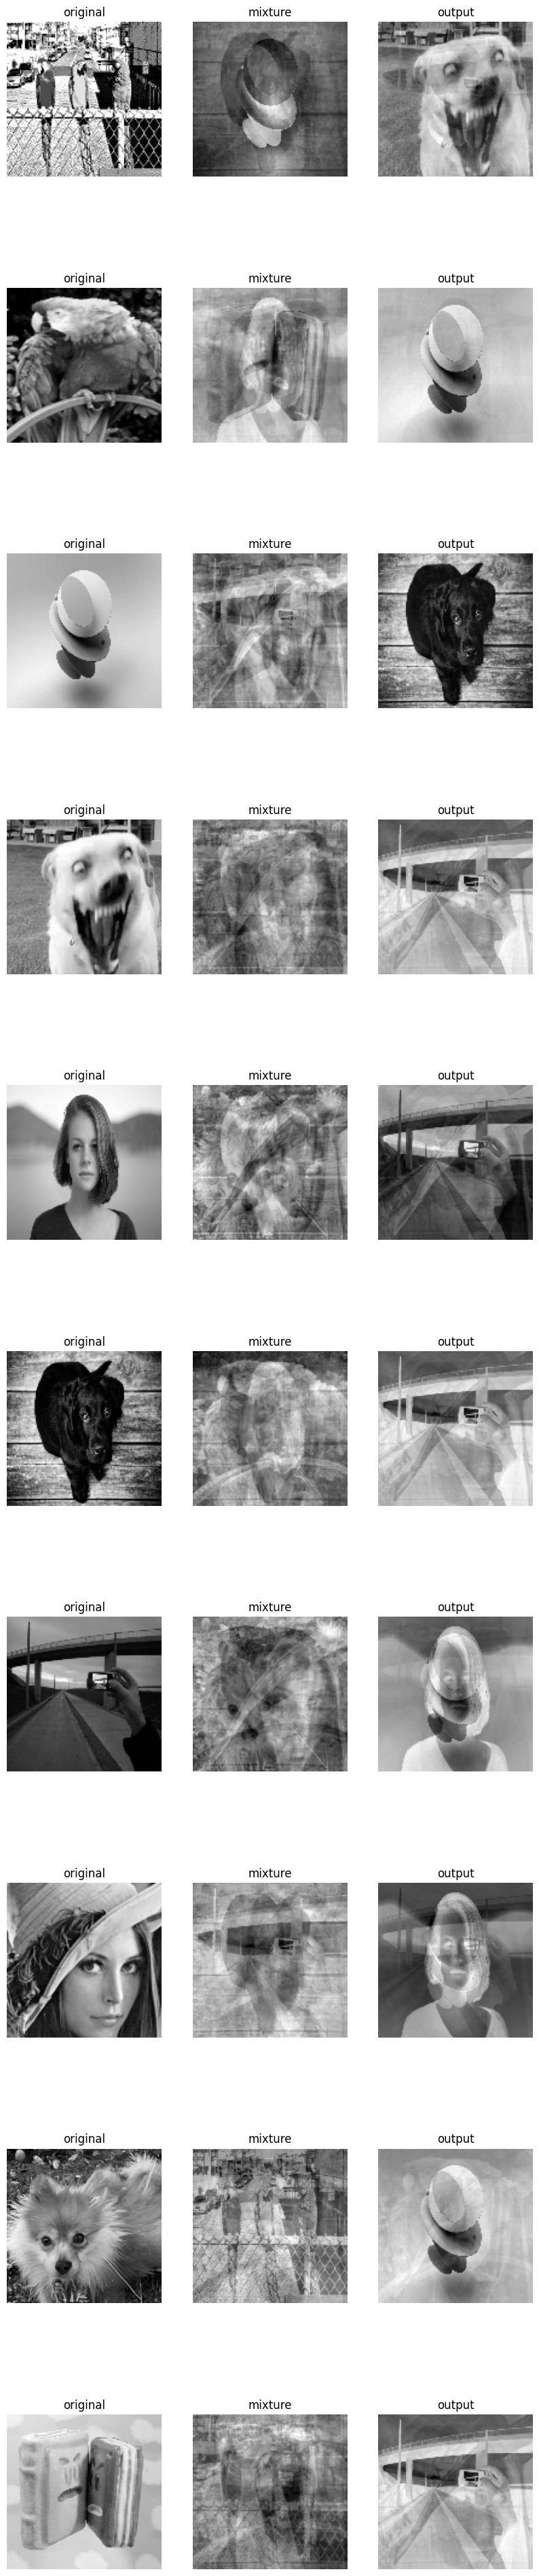

In [25]:
%matplotlib inline

plt.figure(figsize=(10,5*num_of_img))
for i in range(num_of_img):
    plt.subplot(num_of_img, 3, i*3+1)
    plt.imshow(np.reshape(array_list[i], (resize,resize)), cmap='gray')
    plt.title('original')
    plt.axis('off')
    
    plt.subplot(num_of_img, 3, i*3+2)
    plt.imshow(np.reshape(x_white[i], (resize,resize)), cmap='gray')
    plt.title('mixture')
    plt.axis('off')
    
    plt.subplot(num_of_img, 3, i*3+3)
    plt.imshow(np.reshape(data[:, i], (resize,resize)), cmap='gray')
    plt.title('output')
    plt.axis('off')

In [26]:
# for i in range(sub_shape):
#     for j in range(sub_shape):
#         plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
#         plt.plot(data2.T[:, i], data2.T[:, j], '.', ms=1)
#         plt.axis('square')

In [27]:
# def myISI(WAr):
#     N = WAr.shape[0]
#     WAr = np.abs(WAr)
#     ISI = 0.
#     ISI += np.sum(np.sum(WAr,axis=1)/np.max(WAr,axis=1) - 1)
#     # np.max(WAr,axis=1)
#     ISI += np.sum(np.sum(WAr,axis=0)/np.max(WAr,axis=0) - 1)
#     # np.max(WAr,axis=0)
#     ISI = ISI/(2*N*(N-1))
#     return ISI

# w_mnn = model.W1.weight.data.detach().numpy()
# print('myISI(w_mnn*A)=', myISI(w_mnn*A))
# print('myISI(white*A)=', myISI(white*A))
# print('myISI(w_mnn*white)=', myISI(w_mnn*white))
# print('myISI(w_mnn*white.T)=', myISI(w_mnn*white.T))

In [28]:
mixer, b, unmixer = ica.ica1(mixture, ncomp=num_of_img, verbose=True)

Whitening data...
x_white shape: 10, 16384
Done.
Running INFOMAX-ICA ...
Beginning ICA training...
Step 59: Lrate 5.4e-06,Wchange 6.5e-07,Angle 82.22
Done.


In [29]:
# %matplotlib inline

# plt.figure(figsize=(10,5*num_of_img))
# for i in range(num_of_img):
#     plt.subplot(num_of_img, 3, i*3+1)
#     plt.imshow(np.reshape(array_list[i], (resize,resize)), cmap='gray')
#     plt.title('original')
#     plt.axis('off')
    
#     plt.subplot(num_of_img, 3, i*3+2)
#     plt.imshow(np.reshape(x_white[i], (resize,resize)), cmap='gray')
#     plt.title('mixture')
#     plt.axis('off')
    
#     plt.subplot(num_of_img, 3, i*3+3)
#     plt.imshow(np.reshape(-b[i], (resize,resize)), cmap='gray')
#     plt.title('output')
#     plt.axis('off')

In [30]:
# model = model.cpu()
# IPT = IPT.cpu()
data = (IPT.T@model.W1.weight.data.T).cpu().detach().numpy()
# data = model.forward(IPT.T).cpu().detach().numpy()

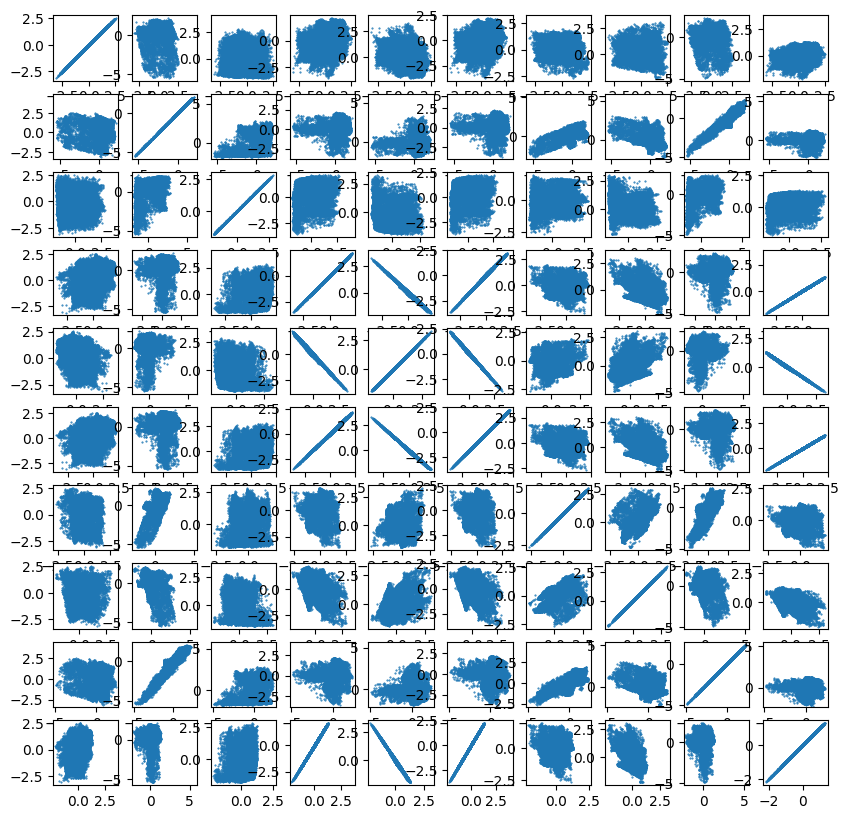

In [31]:
%matplotlib inline
# plt.plot(data[:,0], data[:,1], '.', ms=0.5)
# # plt.axis('square')
plt.figure(figsize=(10,10))
sub_shape = num_of_img
for i in range(sub_shape):
    for j in range(sub_shape):
        plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
        plt.plot(data[:, i], data[:, j], '.', ms=1)
        plt.axis('square')

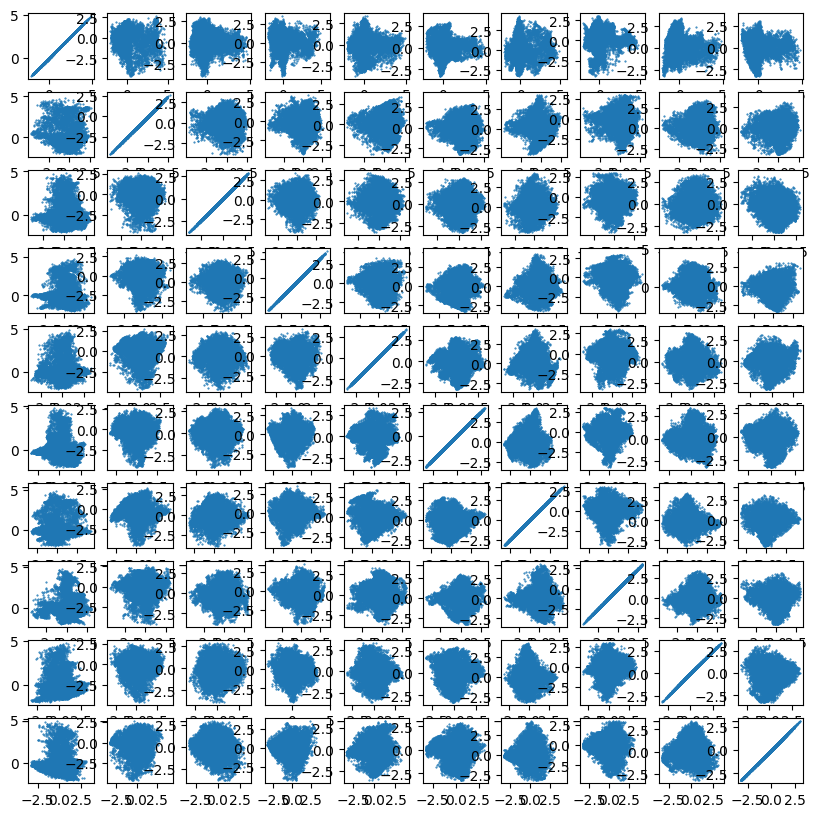

In [32]:
%matplotlib inline
# plt.plot(data[:,0], data[:,1], '.', ms=0.5)
# # plt.axis('square')
plt.figure(figsize=(10,10))
sub_shape = num_of_img
for i in range(sub_shape):
    for j in range(sub_shape):
        plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
        plt.plot(b[i], b[j], '.', ms=1)
        plt.axis('square')

In [33]:
b.shape

(10, 16384)

In [34]:
data.shape

(16384, 10)

In [35]:
map_k_i = np.corrcoef(data.T, b)
map_k_white = np.corrcoef(data.T, x_white)
map_i_white = np.corrcoef(b, x_white)

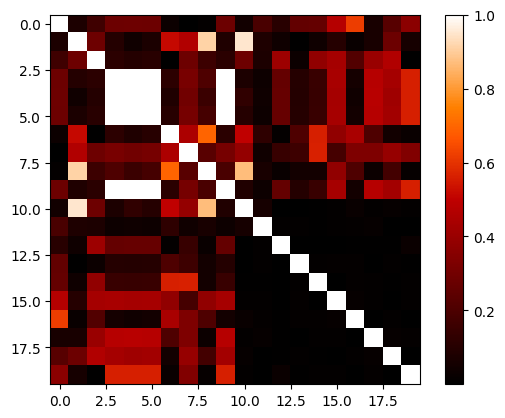

In [36]:
plt.imshow(abs(map_k_i), cmap='gist_heat')
plt.colorbar()

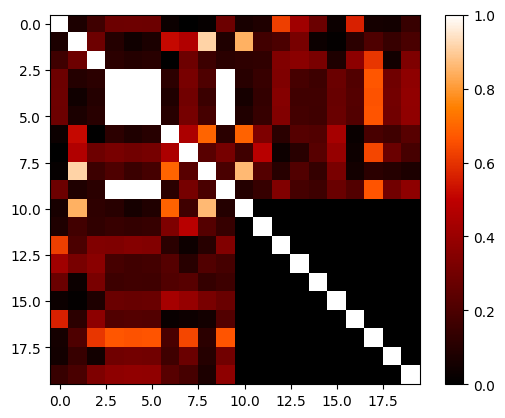

In [37]:
plt.imshow(abs(map_k_white), cmap='gist_heat')
plt.colorbar()

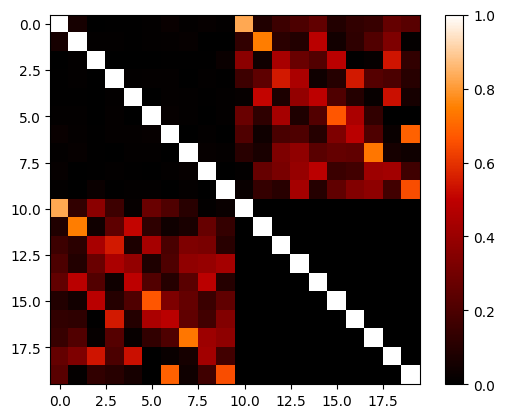

In [38]:
plt.imshow(abs(map_i_white), cmap='gist_heat')
plt.colorbar()

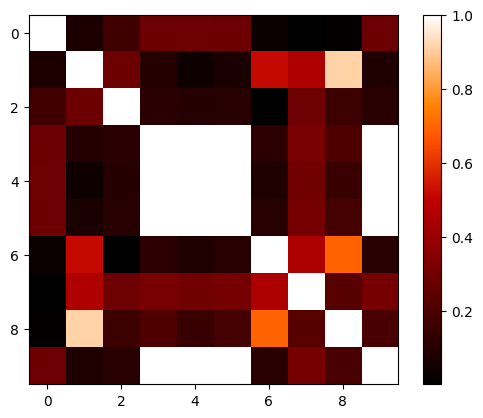

In [39]:
colormap = np.corrcoef(data.T,)

plt.imshow(abs(colormap), cmap='gist_heat')
plt.colorbar()

In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
transformer = FastICA(n_components=num_of_img, random_state=0, whiten='unit-variance')


In [ ]:
opt = transformer.fit_transform(mixture.T)

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,5*num_of_img))
for i in range(num_of_img):
    plt.subplot(num_of_img, 3, i*3+1)
    plt.imshow(np.reshape(array_list[i], (resize,resize)), cmap='gray')
    plt.title('original')
    plt.axis('off')
    
    plt.subplot(num_of_img, 3, i*3+2)
    plt.imshow(np.reshape(x_white[i], (resize,resize)), cmap='gray')
    plt.title('mixture')
    plt.axis('off')
    
    plt.subplot(num_of_img, 3, i*3+3)
    plt.imshow(np.reshape(opt[:, i], (resize,resize)), cmap='gray')
    plt.title('output')
    plt.axis('off')

In [ ]:
plt.imshow(np.corrcoef(opt.T), cmap='gist_heat')

In [ ]:
np.corrcoef(opt.T)

In [ ]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=num_of_img, random_state=0, whiten='unit-variance')

In [ ]:
X_transformed = transformer.fit_transform(mixture.T)

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,5*num_of_img))
for i in range(num_of_img):
    plt.subplot(num_of_img, 3, i*3+1)
    plt.imshow(np.reshape(array_list[i], (resize,resize)), cmap='gray')
    plt.title('original')
    plt.axis('off')
    
    plt.subplot(num_of_img, 3, i*3+2)
    plt.imshow(np.reshape(x_white[i], (resize,resize)), cmap='gray')
    plt.title('mixture')
    plt.axis('off')
    
    plt.subplot(num_of_img, 3, i*3+3)
    plt.imshow(np.reshape(X_transformed[:, i], (resize,resize)), cmap='gray')
    plt.title('output')
    plt.axis('off')

In [ ]:
plt.imshow(np.corrcoef(X_transformed.T), cmap='gist_heat')